# Основы анализа данных в Python

*Алла Тамбовцева*

## Практикум 4. Визуализация данных: часть 1

Импортируем библиотеки `numpy` и `pandas` с сокращённым названием:

In [ ]:
import numpy as np
import pandas as pd

## Часть 1: вспоминаем распределения и изучаем скошенность

Воспользуемся библиотекой `numpy` для того, чтобы сгенерировать выборки объёма $n=100$ из трёх различных распределений:

* стандартного нормального;
* экспоненциального с $\beta=1$;
* смешанного: к выборке из стандартного нормального добавляем значения –5, –10 и –12.

Так как выборки у всех будут генерироваться разные за счёт случайности (псевдослучайности) выбора, для воспроизводимости результатов зафиксируем стартовую точку алгоритма `seed`, равную 999 (это может быть любое целое неотрицательное число, главное, что если оно у всех одинаковое, выборки тоже будут одинаковы).

In [50]:
np.random.seed(999)

# три выборки sample объема 100

sample_norm = np.random.normal(size = 100)
sample_exp = np.random.exponential(size = 100)
sample_skewed = np.append(np.random.normal(size = 94), 
                          np.array([-5, -5, -10, -10, -10, -12]))

Объединим эти выборки в один датафрейм по столбцам (для этого и генерировали выборки одинакового размера, чтобы без проблем получить таблицу из 100 строк):

In [57]:
df = pd.DataFrame({"s1" : sample_norm, "s2" : sample_exp, 
                   "s3" : sample_skewed})
df.head(10)

,s1,s2,s3
0,0.127158,0.659916,-0.578383
1,1.401891,1.069682,-0.791310
2,0.314815,2.720017,1.068553
3,-0.858449,0.783343,-0.500550
4,-0.266134,0.333437,0.895741
5,-0.648901,0.246681,-0.484718
6,1.566268,1.356177,0.086599
7,-2.091370,0.688116,-0.504001
8,1.456328,0.181994,1.638309
9,0.945293,3.200099,1.631034


Построим гистограммы для каждой выборки и прокомментируем форму распределения:

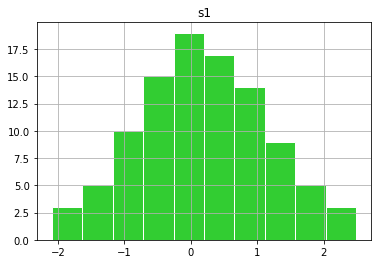

In [52]:
df.hist("s1", color = "limegreen", edgecolor = "white");

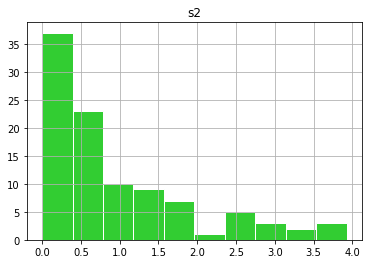

In [53]:
df.hist("s2", color = "limegreen", edgecolor = "white");

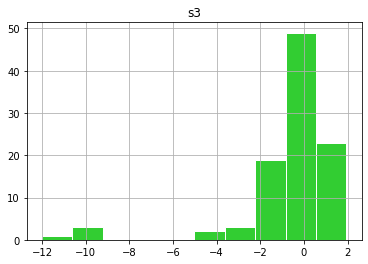

In [54]:
df.hist("s3", color = "limegreen", edgecolor = "white");

А теперь формально зафиксируем скошенность полученных распределений – вычислим коэффициент скошенности (*skewness*):

In [56]:
df.skew().round(2)

s1   -0.01
s2    1.35
s3   -3.17
dtype: float64

Полезный и милый [пост](https://community.hellotriad.com/psychology/post/skewed-distributions-may-not-be-normal-but-they-don-t-have-to-be-iLrwghSXAY6QHdW) про скошенность и положение мер центральной тенденции при разных типах скошенности.

## Часть 2: строим гистограммы и столбиковые диаграммы

В этой части предлагается поработать с небольшой выгрузкой новостей с сайта [N+1](https://nplus1.ru/) за октябрь-ноябрь этого года. 

Переменные в файле `news.xlsx`:

* `title`: заголовок новости;
* `author`: автор новости;
* `date`: дата;
* `diffc`: сложность новости;
* `rubrics`: рубрики, к которым относится новость.

Загрузим данные из файла Excel:

In [ ]:
news = pd.read_excel("news.xlsx")

### Задача 0

Выведите описательные статистики для всех столбцов датафрейма `news`. Прокомментируйте полученные результаты. При необходимости скорректируйте полученный датафрейм и сохраните изменения.

In [ ]:
### YOUR CODE HERE ###

### Задача 1

Постройте гистограмму для сложности новости, измените цвет её заливки и цвет границ столбцов.

In [ ]:
### YOUR CODE HERE ###

### Задача 2

Измените у полученной гистограммы число столбцов, сделав его равным 5.

**Подсказка:** аргумент `bins`.

In [ ]:
### YOUR CODE HERE ###

### Задача 3

Измените у полученной гистограммы шаг (интервал группировки), сделав его равным выборочному стандартному отклонению.

**Подсказка:** все тот же аргумент `bins` и функция `arange()` из библиотеки `numpy`.

In [ ]:
### YOUR CODE HERE ###

### Задача 4

Выведите таблицу частот для столбца `author`. Постройте столбиковую диаграмму для этого показателя. Что нужно сделать, чтобы авторы на диаграмме были упорядочены по алфавиту?

In [ ]:
### YOUR CODE HERE ###

### Задача 5

* Выведите таблицу частот для столбца `rubrics`. 
* Разбейте столбец `rubrics` на столбцы с отдельными рубриками (рубрики разделены запятыми) и сохраните датафрейм из полученных столбцов с названием `rubs`. 

**Подсказка:** метод `str.split()`.

In [ ]:
### YOUR CODE HERE ###

### Задача 6

Выведите таблицу частот для первого столбца в `rubs`, сохраните ее в переменную `tab`. 

In [ ]:
### YOUR CODE HERE ###

### Задача 7

Как можно заметить, в `tab` получилось довольно много категорий, причем некоторые из них довольно редкие (частота менее 5). Ниже приведен код для того, чтобы эти редкие категории «схлопнуть» в одну категорию *Другое*. 

In [ ]:
get_other = lambda x: "Другое" if x in tab[tab < 5].index else x
tab.rename(get_other, inplace = True)
tab = tab.groupby(level = 0).sum()
tab

Постройте для обновленной таблицы частот `tab` столбиковую диаграмму таким образом, чтобы столбцы в ней были упорядочены от самого высокого к самому низкому.

In [ ]:
### YOUR CODE HERE ###